In [79]:
References = ["https://www.geeksforgeeks.org/edit-distance-dp-5/","https://www.geeksforgeeks.org/print-longest-common-substring/","https://www.geeksforgeeks.org/longest-common-subsequence-dp-4/"]

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [81]:
#String similarity implementations based on pseudocode
def StringSimilarityOptimized(S, T):
    miu = 1
    x = 0
    if len(S) >= len(T):
        strA = filterString(S)
        strB = filterString(T)
    else:
        strA = filterString(T)
        strB = filterString(S)
    m = len(strB)
    def SimilarDegreeByMe(strA, strB):
        ld = LD(strA, strB)
        lcs = LCS(strA, strB)
        lccs = LCCS(strA, strB)
        l = len(lccs)
        p = strA.find(lccs) + 1
        if ld == 0:
            return 1
        elif lcs == 0:
            return 0
        else:
            return(lcs/(lcs+ld+p/(l*m)*miu))

    x = SimilarDegreeByMe(strA, strB)
    return x


def filterString(string):
    filtered_string = ""
    for character in string:
        if character.isalnum():
            filtered_string += character

    return(filtered_string)


def LD(str1, str2):
    len1 = len(str1)
    len2 = len(str2)

    DP = [[0 for i in range(len1 + 1)] 
             for j in range(2)]

    for i in range(0, len1 + 1):
        DP[0][i] = i
  

    for i in range(1, len2 + 1):
          

        for j in range(0, len1 + 1):
  

            if (j == 0):
                DP[i % 2][j] = i
  

            elif(str1[j - 1] == str2[i-1]):
                DP[i % 2][j] = DP[(i - 1) % 2][j - 1]
              

            else:
                DP[i % 2][j] = (1 + min(DP[(i - 1) % 2][j], 
                                    min(DP[i % 2][j - 1], 
                                  DP[(i - 1) % 2][j - 1])))
              
    return DP[len2 % 2][len1]

def LCS(X, Y):
    m = len(X)
    n = len(Y)
 

    L = [[None]*(n+1) for i in range(m+1)]
 

    for i in range(m+1):
        for j in range(n+1):
            if i == 0 or j == 0 :
                L[i][j] = 0
            elif X[i-1] == Y[j-1]:
                L[i][j] = L[i-1][j-1]+1
            else:
                L[i][j] = max(L[i-1][j] , L[i][j-1])
 

    return L[m][n]

def LCCS(X,Y):

    X += "*"
    m = len(X)
    n = len(Y)

    
    result = 0
  
    end = 0
  
    length = [[0 for j in range(m)]
                 for i in range(2)]
  
    currRow = 0
  
    for i in range(0, m + 1):
        for j in range(0, n + 1):
            if (i == 0 or j == 0):
                length[currRow][j] = 0
             
            elif (X[i - 1] == Y[j - 1]):
                length[currRow][j] = length[1 - currRow][j - 1] + 1
                 
                if (length[currRow][j] > result):
                    result = length[currRow][j]
                    end = i - 1
            else:
                length[currRow][j] = 0

        currRow = 1 - currRow

    if (result == 0):
        return "-1"
  
    string = X[end - result + 1 : end + 1]
    return string


In [82]:
#Levenshtein distance

def levenshteinDistanceCalculation(S, T):
    total = 0
    x = LD(S,T)
    total = 1-(x/max(len(S),len(T)))
    return total



def LD(str1, str2):
        len1 = len(str1)
        len2 = len(str2)

        DP = [[0 for i in range(len1 + 1)] 
                for j in range(2)]

        for i in range(0, len1 + 1):
            DP[0][i] = i
    

        for i in range(1, len2 + 1):
            

            for j in range(0, len1 + 1):
    

                if (j == 0):
                    DP[i % 2][j] = i
    

                elif(str1[j - 1] == str2[i-1]):
                    DP[i % 2][j] = DP[(i - 1) % 2][j - 1]
                

                else:
                    DP[i % 2][j] = (1 + min(DP[(i - 1) % 2][j], 
                                        min(DP[i % 2][j - 1], 
                                    DP[(i - 1) % 2][j - 1])))
                
        return DP[len2 % 2][len1]


In [83]:
#data yang digunakan
str1 = "kalung"
str2 =  "hijklm6789"
lstString1 = ["gelang","kangkung","buntung","kantung","tinggi","centang","lantas","sinting"]
lstString2 = ["ab6efg723", "uilj12789", "h67edfg", "h675fgh", "lmno03149", "afgjkl01289", "khijklm6789", "hijklm67890"]

resultSS1 = []
resultLD1 = []

resultSS2 = []
resultLD2 = []

for word in lstString1:
    resultSS1.append(StringSimilarityOptimized(str1,word))
    resultLD1.append(levenshteinDistanceCalculation(str1,word))

for word in lstString2:
    resultSS2.append(StringSimilarityOptimized(str2,word))
    resultLD2.append(levenshteinDistanceCalculation(str2,word))
    

In [84]:
print(resultSS1)
print(resultLD1)
print("Standard Deviation of sample 1 string similarity is % s" % (statistics.stdev(resultSS1)))
print("Standard Deviation of sample 1 levenshtein distance is % s" % (statistics.stdev(resultLD1)))

[0.4675324675324675, 0.6, 0.4122137404580153, 0.6870229007633588, 0.23762376237623764, 0.35294117647058826, 0.27272727272727276, 0.26666666666666666]
[0.5, 0.625, 0.4285714285714286, 0.7142857142857143, 0.0, 0.2857142857142857, 0.16666666666666663, 0.2857142857142857]
Standard Deviation of sample 1 string similarity is 0.16409018319994714
Standard Deviation of sample 1 levenshtein distance is 0.23787058917207002


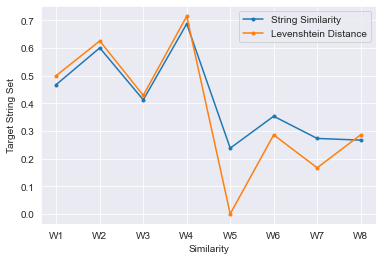

In [85]:
#for data set 1
sns.set_style('darkgrid')
x = ["w1","w2","w3","w4","w5","w6","w7","w8"]
plt.plot(x, resultSS1,marker='.')
plt.plot(x, resultLD1,marker='.')
plt.xlabel('Similarity')
plt.ylabel('Target String Set')
labels = x
plt.legend([ 'String Similarity','Levenshtein Distance'])
plt.xticks(x, labels)
plt.savefig("Target String 1")
plt.show()

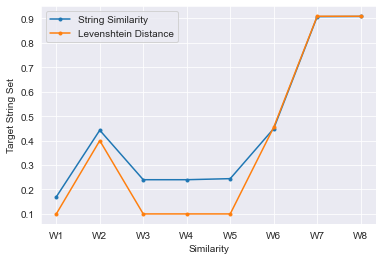

In [86]:
#for data set 2
sns.set_style('darkgrid')
x = ["t1","t2","t3","t4","t5","t6","t7","t8"]
plt.plot(x, resultSS2,marker='.')
plt.plot(x, resultLD2,marker='.')
plt.xlabel('Similarity')
plt.ylabel('Target String Set')
labels = x
plt.legend([ 'String Similarity','Levenshtein Distance'])
plt.xticks(x, labels)
plt.savefig("Target String 2")
plt.show()